In [6]:
#imports
import pandas as pd 
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

#questionable imports 
%matplotlib inline 
import numpy as np

In [7]:
#get data into python 

#Kp and ap data from 1932
kpdata = pd.read_csv('kp_ap_since_1932.txt', skiprows=29, sep='\s+', header=0, index_col=False)

#Sunspot data from 1818 
sndata = pd.read_csv('SN_d_tot_V2.0.txt', error_bad_lines=False, sep='\s+', header=0, index_col=False, usecols=['YYYY', 'M', 'DD', 'D,FYR', 'SS#', 'SDEV', '#OBS'], na_values=['-1'])

#rename first 3 cols
sndata.columns = ['Year', 'Month', 'Day', 'D,FYR', 'SS#', 'SDEV', '#OBS'] 

/var/folders/l9/y8y3rmys2sl93tzzph3dl7jw0000gr/T/ipykernel_60946/3863270634.py:7: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  sndata = pd.read_csv('SN_d_tot_V2.0.txt', error_bad_lines=False, sep='\s+', header=0, index_col=False, usecols=['YYYY', 'M', 'DD', 'D,FYR', 'SS#', 'SDEV', '#OBS'], na_values=['-1'])


In [8]:
sndata

,Year,Month,Day,"D,FYR",SS#,SDEV,#OBS
0,1818,1,1,1818.001,NaN,NaN,0
1,1818,1,2,1818.004,NaN,NaN,0
2,1818,1,3,1818.007,NaN,NaN,0
3,1818,1,4,1818.010,NaN,NaN,0
4,1818,1,5,1818.012,NaN,NaN,0
...,...,...,...,...,...,...,...
75266,2024,1,27,2024.072,63.0,10.1,26
75267,2024,1,28,2024.075,68.0,10.8,26
75268,2024,1,29,2024.078,70.0,8.7,32
75269,2024,1,30,2024.081,70.0,10.6,32


In [10]:
kpdata.columns = ['Year', 'Month', 'Day', 'hh.h', 'hh._m', 'days', 'days_m','Kp', 'ap', 'D']
kpdaily = kpdata.groupby(['Year', 'Month', 'Day']).mean()['Kp'].reset_index()
kpdaily

,Year,Month,Day,Kp
0,1932,1,1,2.958250
1,1932,1,2,3.791750
2,1932,1,3,2.416625
3,1932,1,4,0.999875
4,1932,1,5,0.749875
...,...,...,...,...
33650,2024,2,17,0.958375
33651,2024,2,18,1.166625
33652,2024,2,19,0.166625
33653,2024,2,20,1.458375


In [16]:
merged = pd.merge(sndata[['Year', 'Month', 'Day', 'SS#']], kpdaily[['Year', 'Month', 'Day', 'Kp']], on=['Year', 'Month', 'Day'], how='inner')

Text(0, 0.5, 'Kp Index')

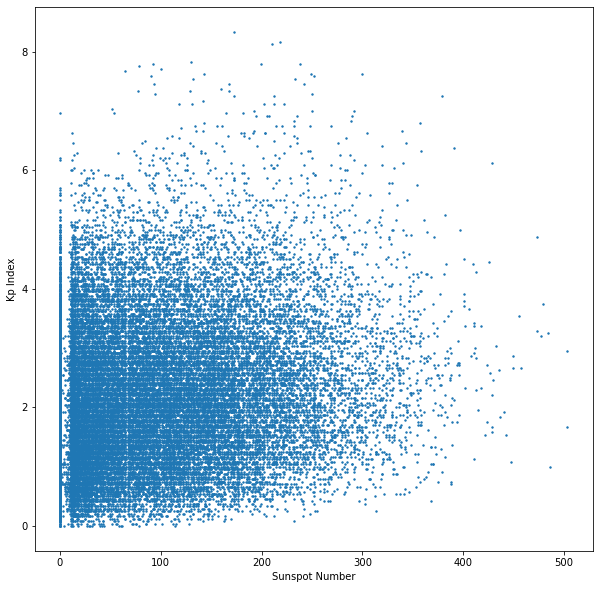

In [29]:
plt.figure(figsize=(10, 10))
plt.scatter(merged['SS#'], merged['Kp'], alpha=1, s=2)
plt.xlabel('Sunspot Number')
plt.ylabel('Kp Index')
# plt.xscale('log')
# plt.yscale('log')